In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy import signal
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf

# Alguns exemplos de sinais e sua representação

- no domínio do tempo
- no domínio da frequência (magnitude)
- tempo/frequência

**OBS: Tudo no computador é discreto (tenha isso em mente)**
Por hora vamos assumir que a discretização está completamente correta.

### Funções para plotar as figuras 

In [3]:
def plot_time(xt, fs):
    plt.figure(figsize=(12,3))
    plt.plot(time, xt, '-b', linewidth = 1, alpha = 0.8)
    plt.grid(linestyle = '--', which='both')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude [-]')
    plt.xlim((0, time[-1]))

def plot_freq_magdB(xt, fs):
    nfft = len(xt)
    Xjw = np.fft.fft(xt) 
    Xjw_mag_dB = 20*np.log10(2*np.abs(Xjw)/nfft)
    freq = np.linspace(0, (nfft-1)*fs/nfft, nfft)
    
    plt.figure(figsize=(12,3))
    plt.semilogx(freq, Xjw_mag_dB, '-b', linewidth = 1, alpha = 0.8)
    plt.grid(linestyle = '--', which='both')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.xlim((1e-1, fs/2))
    plt.ylim((max(Xjw_mag_dB)-50, max(Xjw_mag_dB)+10))

def plot_spectrogram(xt, fs, logscale = False):
    win = signal.windows.hann(2048)
    f, t, Sxx = signal.spectrogram(xt, fs, window = win, noverlap = len(win)/2, scaling = 'spectrum')

    plt.figure(figsize=(14,4))
    p = plt.pcolormesh(t, f, 10*np.log10(Sxx/np.amax(Sxx)), shading='gouraud', vmin = -60, cmap = 'plasma')
    plt.colorbar(p, shrink = 0.7, label = '|p| [dB]')
    plt.ylim((10, fs/2))
    if logscale:
        plt.yscale('log')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.show()

# Seno e cosseno

Neste caso, o sinal é analítico

\begin{equation}
x(t) = A \cos(2\pi f_0 t)
\end{equation}

ou 

\begin{equation}
x(t) = A \sin(2\pi f_0 t)
\end{equation}

Veremos depois que tais sinais são essencialmente a mesma coisa, mas suficientemente diferentes pra formar uma boa **base ortogonal**.

Exploremos primeiro as funções pra criar a variável temporal:

- arange:
- linspace: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [7]:
fs = 100
time = np.arange(start = 0, stop = 1, step = 1/fs)
print("Time via arange function: {}".format(time))

#time = np.linspace(start = 0, stop = 1, num = 101)
#print("Time via linspace function: {}".format(time))

Time via arange function: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [13]:
time[1]

0.01

## Seno e cosseno

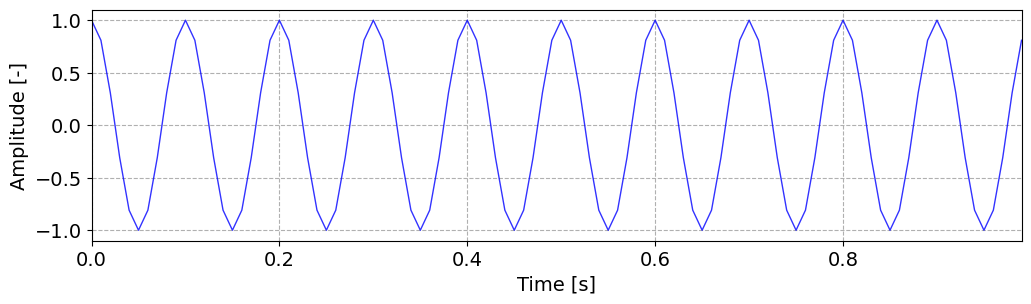

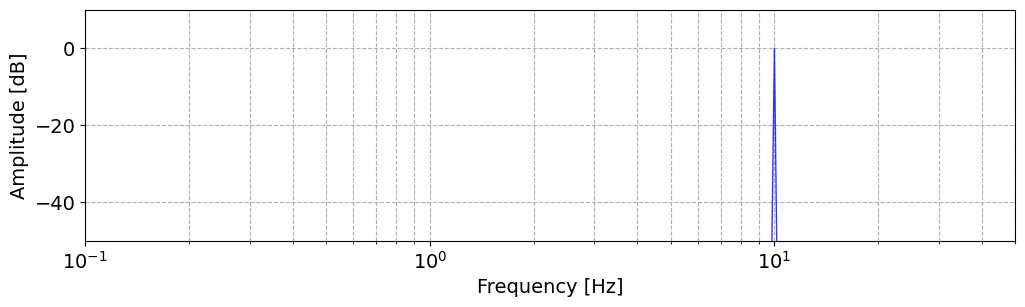

In [15]:
A = 1
f0 = 10
xt = A*np.cos(2*np.pi*f0*time)

plot_time(xt, fs)
plot_freq_magdB(xt, fs)

In [27]:
xt[-1]

0.8090169943749439

# Sweep

Neste caso, o sinal também é analítico e pode ser representado por:

\begin{equation}
x(t) = A \cos(2\pi f(t) t + \phi)
\end{equation}
em que $f(t)$ expressa como a frequência varia com o tempo.

veja a ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html

In [31]:
#### Sweep  ######################
fs = 44100
time = np.arange(start = 0, stop = 4, step = 1/fs)
xt = signal.chirp(t = time, f0 = 100, t1 = time[-1], f1 = 10000, phi = -90, method='logarithmic') #'logarithmic'

In [27]:
# x(t)
ipd.Audio(xt, rate=fs) # load a NumPy array

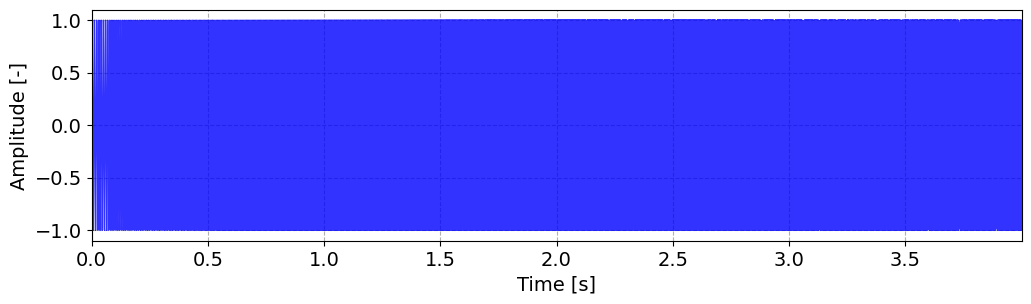

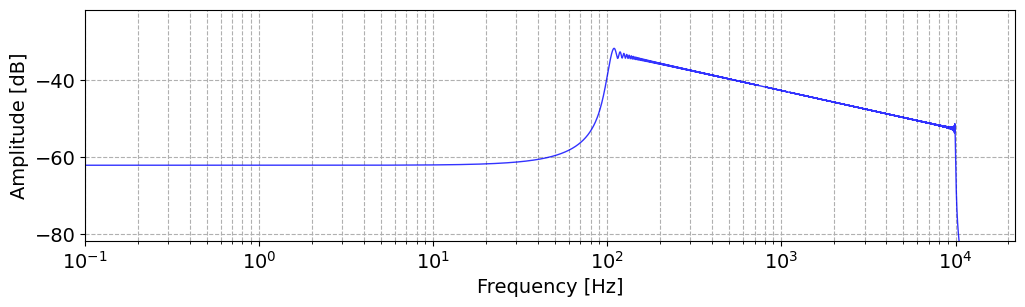

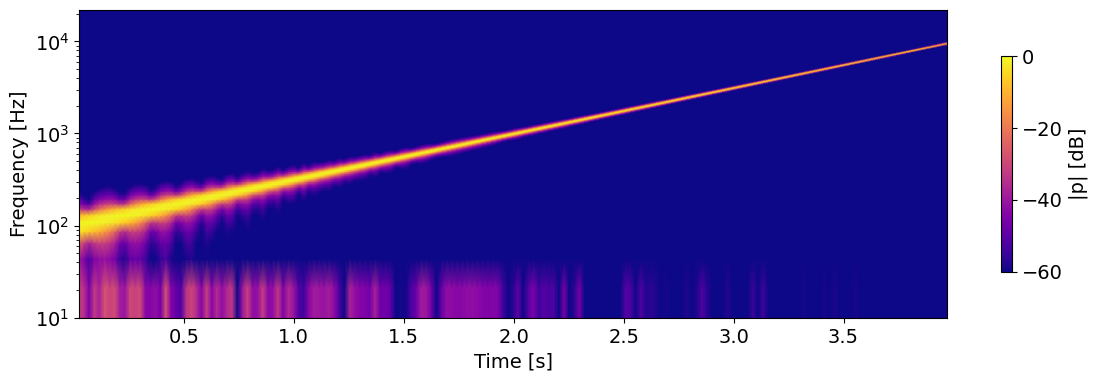

In [35]:
plot_time(xt, fs)
plot_freq_magdB(xt, fs)
plot_spectrogram(xt, fs, logscale = True)

# Ruído branco

Neste caso o sinal **não** é dererminístico. O sinal é gerado pelo sorteio de números aleatórios com uma distribuilção Normal

\begin{equation}
x(t) \propto \mathcal{N}(\mu, \sigma^2)
\end{equation}

In [37]:
#### Ruído branco ######################
fs = 44100
time = np.arange(start = 0, stop = 4, step = 1/fs)
xt = np.random.normal(loc = 0, scale = 1, size = len(time))

In [39]:
# x(t)
ipd.Audio(xt, rate=fs) # load a NumPy array

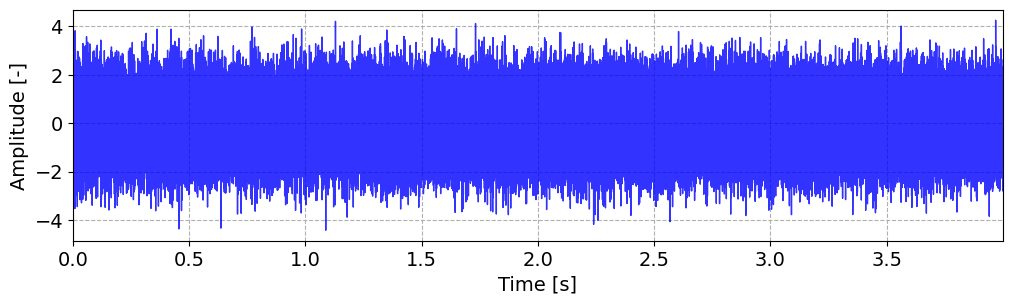

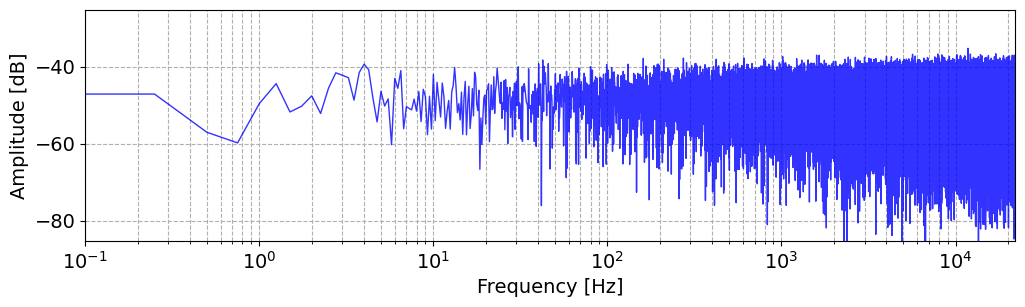

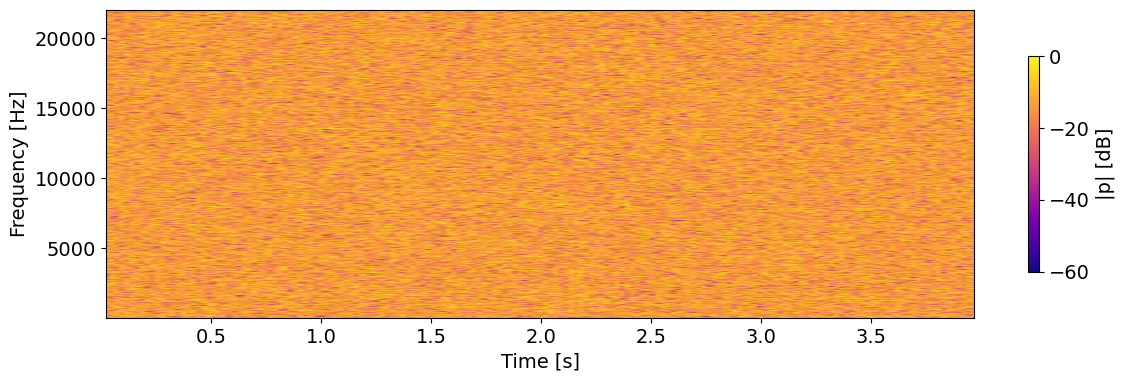

In [41]:
plot_time(xt, fs)
plot_freq_magdB(xt, fs)
plot_spectrogram(xt, fs, logscale = False)

# Um sinal de voz

Claramente não é determinístico e não há nenhuma equação pronta pra gerá-lo.

**Por que eu usei o linspace aqui?**

In [43]:
##### x(t) anechoic signal #################
xt, fs = sf.read('voice.wav')
time = np.linspace(start = 0, stop = (len(xt)-1)/fs, num = len(xt))

In [45]:
# x(t)
ipd.Audio(xt, rate=fs) # load a NumPy array

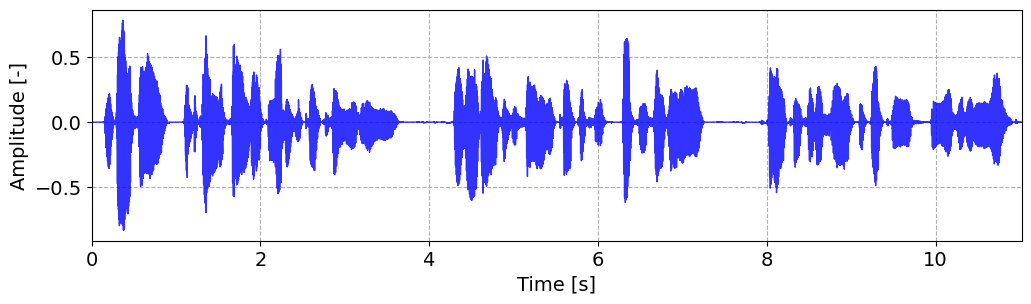

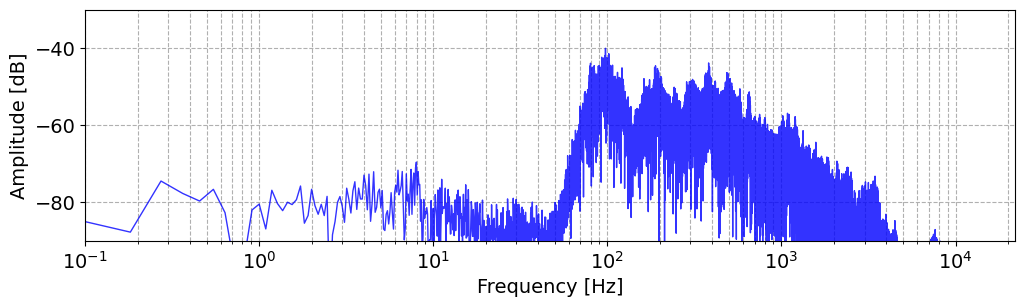

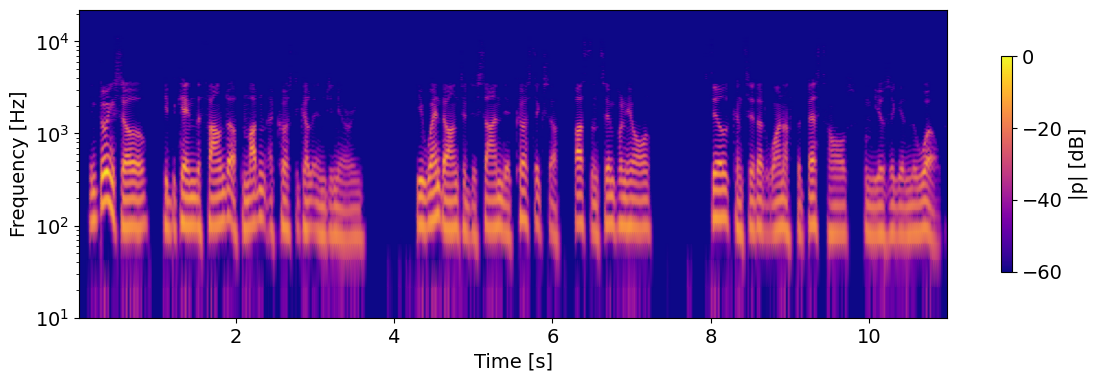

In [47]:
plot_time(xt, fs)
plot_freq_magdB(xt, fs)
plot_spectrogram(xt, fs, logscale = True)